# **Delhivery-Feature-Engineering**

# Introduction:

Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating
the commerce operating system.
They achieve this by utilizing world-class infrastructure, ensuring the highest quality in
logistics operations, and harnessing cutting-edge engineering and technology capabilities.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import statsmodels
from scipy.special import comb
from scipy.stats import binom
from scipy.stats import norm,t
from scipy.stats import poisson, expon,geom, ttest_1samp, ttest_ind,ttest_ind_from_stats,boxcox
from scipy.stats import shapiro, levene, kruskal, chi2, chi2_contingency,pearsonr, spearmanr
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Scalar/DAV- Python libraries/delhivery_data.csv'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Setting the display of columns limit to 30
pd.set_option('display.max_columns',30)

In [ ]:
#read the csv file
df=pd.read_csv(path)
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
#toatal row and columns count
df.shape

(144867, 24)

In [ ]:
#info of columns value count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
#describe numerical
df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
cutoff_factor,144867.0,232.926567,344.755577,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
factor,144867.0,2.120107,1.715421,0.144000,1.604264,1.857143,2.213483,77.387097
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [ ]:
#describe object
df.describe(include='object').T

,count,unique,top,freq
data,144867,2,training,104858
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144867,2,FTL,99660
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81


In [ ]:
#drop unknown columns
unknown_columns = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df = df.drop(columns=unknown_columns)
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [ ]:
#check length of  datatable after droping unknown fields
df.shape

(144867, 19)

In [ ]:
# check empty/null field in the table
df.isnull().sum().sort_values(ascending=False)

,0
source_name,293
destination_name,261
data,0
start_scan_to_end_scan,0
segment_osrm_time,0
segment_actual_time,0
osrm_distance,0
osrm_time,0
actual_time,0
actual_distance_to_destination,0


In [ ]:
#Check for duplicated rows in the datatable
df[df.duplicated()].value_counts()

,,,,,,,,,,,,,,,,,,,count
data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,


In [ ]:
#converting columns dataype into datatime

df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

#converting columns dataype into datatime

datetime_cols =['trip_creation_time', 'od_start_time', 'od_end_time']
for _ in datetime_cols:
  df[_] = pd.to_datetime(df[_])


In [ ]:
plt.pie(x=df['data'].value_counts(),autopct='%.2f%%')
plt.title('Training vs Test')
plt.show()
# 72.38 % of the data are training data

NameError: name 'plt' is not defined

# **2) Merging of rows and aggregation of fields**

Since delivery details of one package are divided into several rows (think of it as connecting flights to reach a particular destination). Now think about how we should treat their fields if we combine these rows? What aggregation would make sense if we merge. What would happen to the numeric fields if we merge the rows.

In [ ]:
# Grouping by segment
# Creating a unique identifier for each segment of a trip

segment_cols = ['segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']

df['segment_key'] = df['trip_uuid']+ '+'+df['source_center']+'+'+df['destination_center']

for col in segment_cols:
  df[col+'_sum'] = df.groupby('segment_key')[col].cumsum()

df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320+IND388121AAA+IND388620AAB,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320+IND388121AAA+IND388620AAB,24.0,20.0,21.7243
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320+IND388121AAA+IND388620AAB,40.0,27.0,32.5395
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320+IND388121AAA+IND388620AAB,61.0,39.0,45.5619
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320+IND388121AAA+IND388620AAB,67.0,44.0,49.4772


In [ ]:
# Aggregating at segment level & Creating a dictionary for aggregation at segment level

create_segment_dict = {
  'trip_uuid' : 'first',
  'data': 'first',
  'route_type': 'first',
  'trip_creation_time': 'first',
  'source_name': 'first',
  'destination_name': 'last',
  'od_start_time': 'first',
  'od_end_time': 'last',
  'start_scan_to_end_scan': 'first',
  'actual_distance_to_destination': 'last',
  'actual_time': 'last',
  'osrm_time': 'last',
  'osrm_distance': 'last',
  'segment_actual_time' : 'sum',
  'segment_osrm_time' : 'sum',
  'segment_osrm_distance' : 'sum',
  'segment_actual_time_sum': 'last',
  'segment_osrm_time_sum': 'last',
  'segment_osrm_distance_sum': 'last',
}

In [ ]:
segment_agg_data = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment_agg_data = segment_agg_data.sort_values(by=['segment_key','od_end_time'])
segment_agg_data

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,728.0,534.0,670.6205
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,820.0,474.0,649.8528
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,46.0,26.0,28.1995
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,95.0,39.0,55.9899
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069+IND628204AAA+IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,49.0,42.0,42.1431
26364,trip-153861115439069069+IND628613AAA+IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,89.0,77.0,78.5869
26365,trip-153861115439069069+IND628801AAA+IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,29.0,14.0,16.0184
26366,trip-153861118270144424+IND583119AAA+IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303,233.0,42.0,52.5303


In [ ]:
segment_agg_data

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,728.0,534.0,670.6205
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,820.0,474.0,649.8528
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,46.0,26.0,28.1995
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,95.0,39.0,55.9899
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069+IND628204AAA+IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,49.0,42.0,42.1431
26364,trip-153861115439069069+IND628613AAA+IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,89.0,77.0,78.5869
26365,trip-153861115439069069+IND628801AAA+IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,29.0,14.0,16.0184
26366,trip-153861118270144424+IND583119AAA+IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303,233.0,42.0,52.5303


In [ ]:
segment_agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     26368 non-null  object        
 1   trip_uuid                       26368 non-null  object        
 2   data                            26368 non-null  category      
 3   route_type                      26368 non-null  category      
 4   trip_creation_time              26368 non-null  datetime64[ns]
 5   source_name                     26302 non-null  object        
 6   destination_name                26287 non-null  object        
 7   od_start_time                   26368 non-null  datetime64[ns]
 8   od_end_time                     26368 non-null  datetime64[ns]
 9   start_scan_to_end_scan          26368 non-null  float64       
 10  actual_distance_to_destination  26368 non-null  float64       
 11  ac

# **3) Feature Engineering:**
Extract features from the below fields:

In [ ]:
df_seg = segment_agg_data.copy()

In [ ]:
# 1. Calculating time difference between od_start_time and od_end_time
df_seg['od_total_time']=(df_seg['od_end_time'] - df_seg['od_start_time'])
df_seg['od_time_diff_hour'] = (df_seg['od_total_time']).dt.total_seconds()/3600
df_seg

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_total_time,od_time_diff_hour
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,728.0,534.0,670.6205,0 days 21:00:36.265275,21.010074
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,820.0,474.0,649.8528,0 days 16:39:30.322728,16.658423
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,46.0,26.0,28.1995,0 days 00:58:49.943264,0.980540
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,95.0,39.0,55.9899,0 days 02:02:46.769161,2.046325
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,608.0,231.0,317.7408,0 days 13:54:38.335721,13.910649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069+IND628204AAA+IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,49.0,42.0,42.1431,0 days 01:02:06.911603,1.035253
26364,trip-153861115439069069+IND628613AAA+IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,89.0,77.0,78.5869,0 days 01:31:05.267810,1.518130
26365,trip-153861115439069069+IND628801AAA+IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,29.0,14.0,16.0184,0 days 00:44:10.464194,0.736240
26366,trip-153861118270144424+IND583119AAA+IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303,233.0,42.0,52.5303,0 days 04:47:28.440393,4.791233


In [ ]:
# using regex pattern to seperate the city,place,state
def extract_info(name):
    pattern = r'^(?P<city>[^\s_]+)_?(?P<place>[^\(\)]*)\s?\((?P<state>[A-Za-z\s&]+)\)$'
    match = re.match(pattern, name)
    if match:
        city = match.group('city').strip()
        place = match.group('place').strip() if match.group('place') else city
        state = match.group('state').strip()
        return city, place, state
    else:
        return None, None, None

In [ ]:
df_seg[['source_city', 'source_place', 'source_state']] = df_seg['source_name'].astype(str).apply(lambda x: pd.Series(extract_info(x)))

In [ ]:
df_seg[['destination_city', 'destination_place', 'destination_state']] = df_seg['destination_name'].astype(str).apply(lambda x: pd.Series(extract_info(x)))


In [ ]:
df_seg

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_total_time,od_time_diff_hour,source_city,source_place,source_state,destination_city,destination_place,destination_state
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,728.0,534.0,670.6205,0 days 21:00:36.265275,21.010074,Kanpur,Central_H_6,Uttar Pradesh,Gurgaon,Bilaspur_HB,Haryana
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,820.0,474.0,649.8528,0 days 16:39:30.322728,16.658423,Bhopal,Trnsport_H,Madhya Pradesh,Kanpur,Central_H_6,Uttar Pradesh
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,46.0,26.0,28.1995,0 days 00:58:49.943264,0.980540,Doddablpur,ChikaDPP_D,Karnataka,Chikblapur,ShntiSgr_D,Karnataka
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,95.0,39.0,55.9899,0 days 02:02:46.769161,2.046325,Tumkur,Veersagr_I,Karnataka,Doddablpur,ChikaDPP_D,Karnataka
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,608.0,231.0,317.7408,0 days 13:54:38.335721,13.910649,Gurgaon,Bilaspur_HB,Haryana,Chandigarh,Mehmdpur_H,Punjab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069+IND628204AAA+IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,49.0,42.0,42.1431,0 days 01:02:06.911603,1.035253,Tirchchndr,Shnmgprm_D,Tamil Nadu,Thisayanvilai,UdnkdiRD_D,Tamil Nadu
26364,trip-153861115439069069+IND628613AAA+IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,89.0,77.0,78.5869,0 days 01:31:05.267810,1.518130,Peikulam,SriVnktpm_D,Tamil Nadu,Tirunelveli,VdkkuSrt_I,Tamil Nadu
26365,trip-153861115439069069+IND628801AAA+IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,29.0,14.0,16.0184,0 days 00:44:10.464194,0.736240,Eral,Busstand_D,Tamil Nadu,Tirchchndr,Shnmgprm_D,Tamil Nadu
26366,trip-153861118270144424+IND583119AAA+IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karn

In [ ]:
df_seg.loc[df_seg['source_place'] == '', 'source_place']=df_seg['source_city']
df_seg.loc[df_seg['destination_place']=='','destination_place']=df_seg['destination_city']

In [ ]:
df_seg['source_place'].fillna(df_seg['source_city'], inplace=True)

<ipython-input-190-bb9ff8226e0b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_seg['source_place'].fillna(df_seg['source_city'], inplace=True)


In [ ]:
df_seg['source_state'].value_counts().to_frame().style.background_gradient(cmap='Reds')

,count
source_state,
Maharashtra,3565
Karnataka,3453
Tamil Nadu,2130
Haryana,2056
Uttar Pradesh,1832
Telangana,1484
Gujarat,1401
West Bengal,1368
Andhra Pradesh,1310


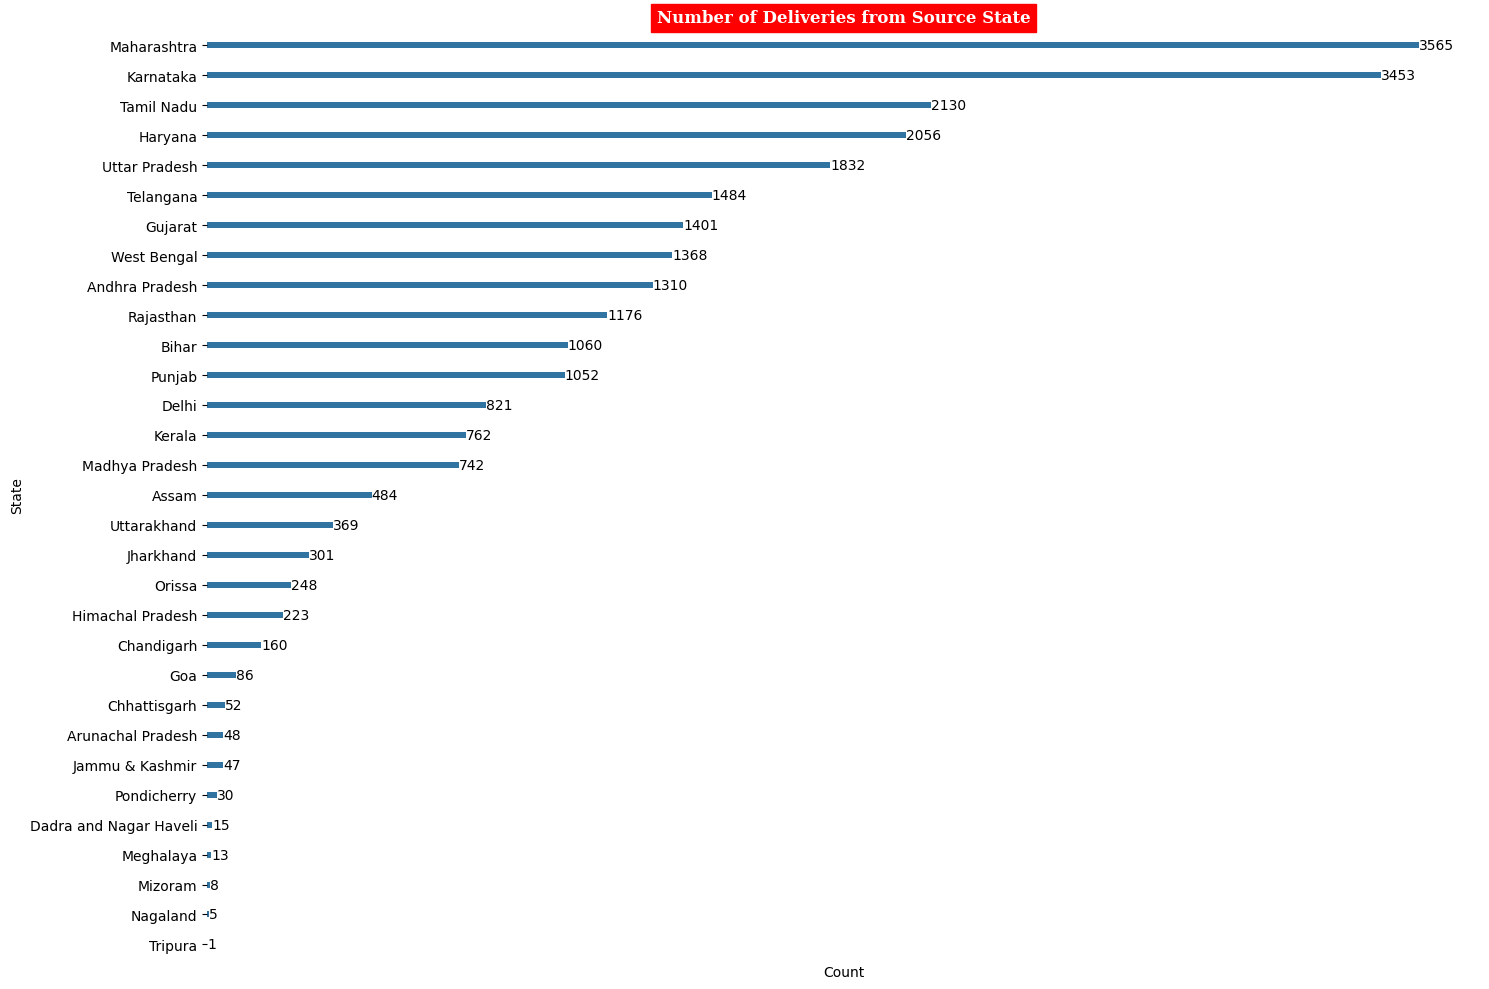

In [ ]:
state_counts = df_seg['source_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source State',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

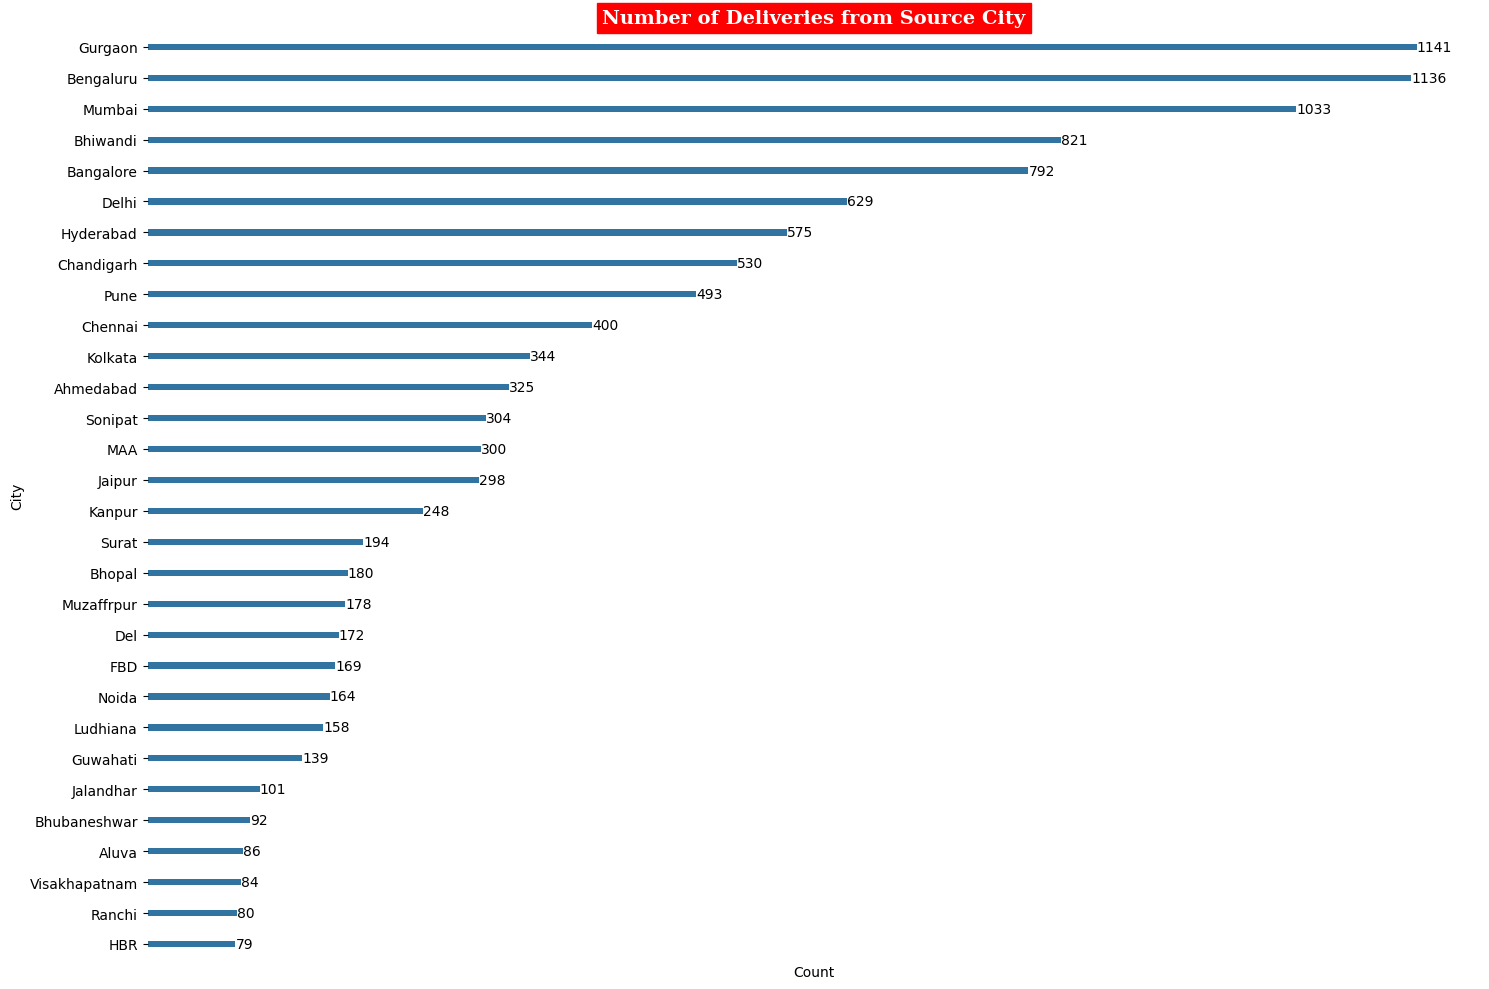

In [ ]:
city_counts = df_seg['source_city'].value_counts().to_frame().reset_index()[:30]
city_counts.columns = ['City', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='City', x='Count', data=city_counts,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source City',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

**Source state contribution**

Maharashtra, Karnataka ,Tamil Nadu, Haryana, and Uttar Pradesh are the top contributors where maximum bookings are recorded in this month indicating significant engagement.

**Source City contribution**

Cities like Bengaluru, Gurgaon, Mumbai, Bhiwandi, Delhi, Hyderabad where the major no.of booking are recorded.

In [ ]:
df_seg['destination_city'].nunique()

1239

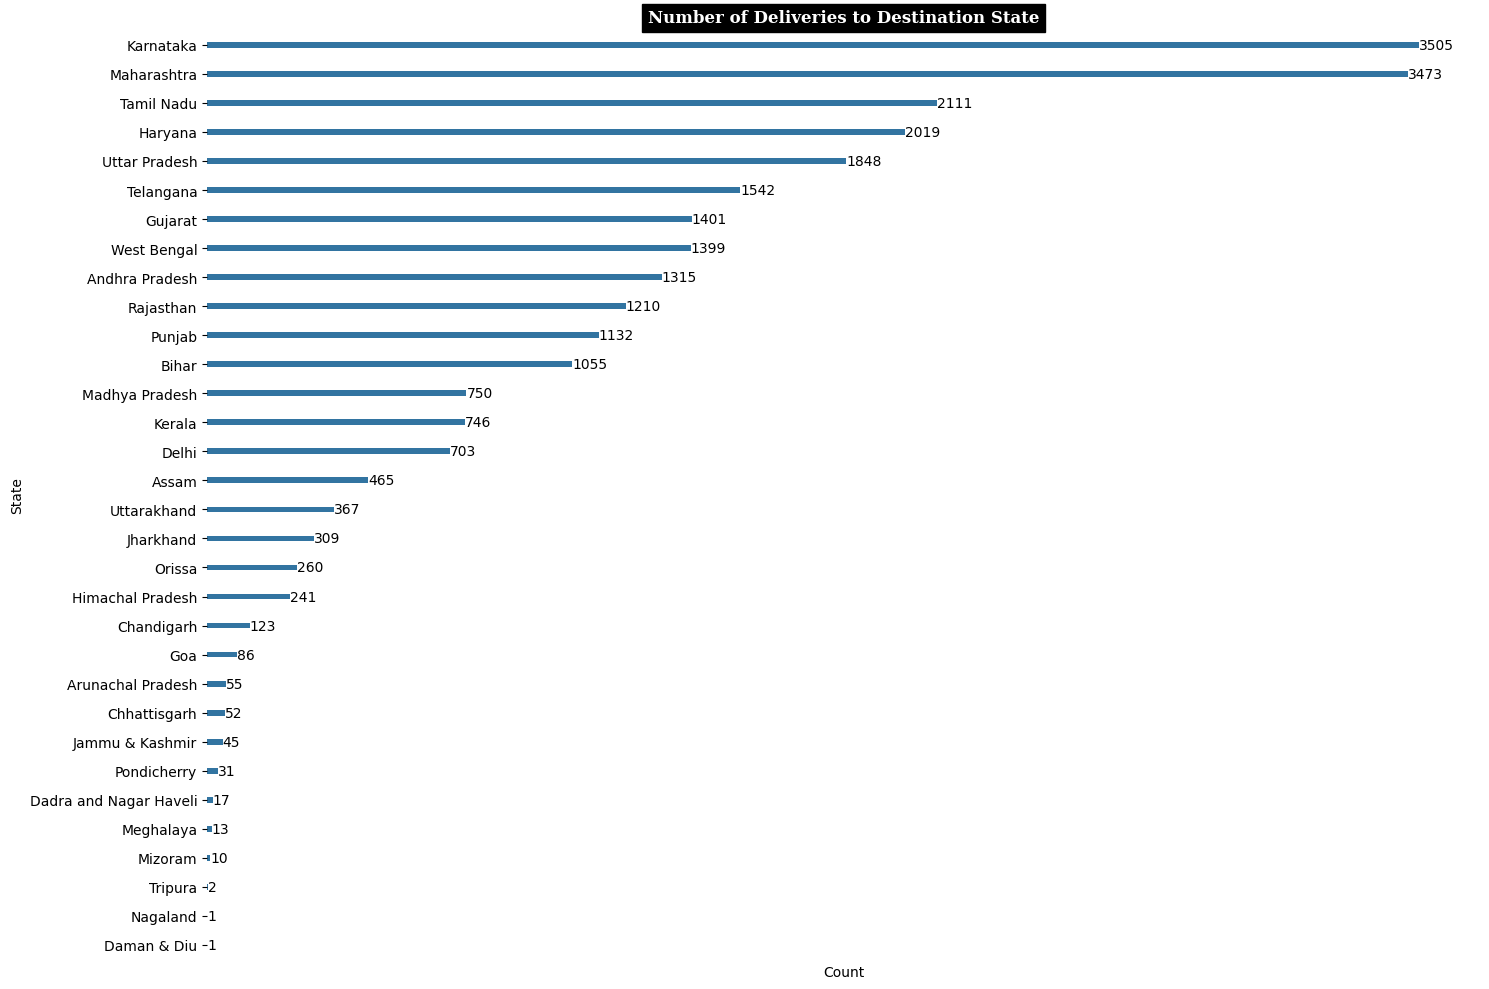

In [ ]:
state_counts = df_seg['destination_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries to Destination State',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

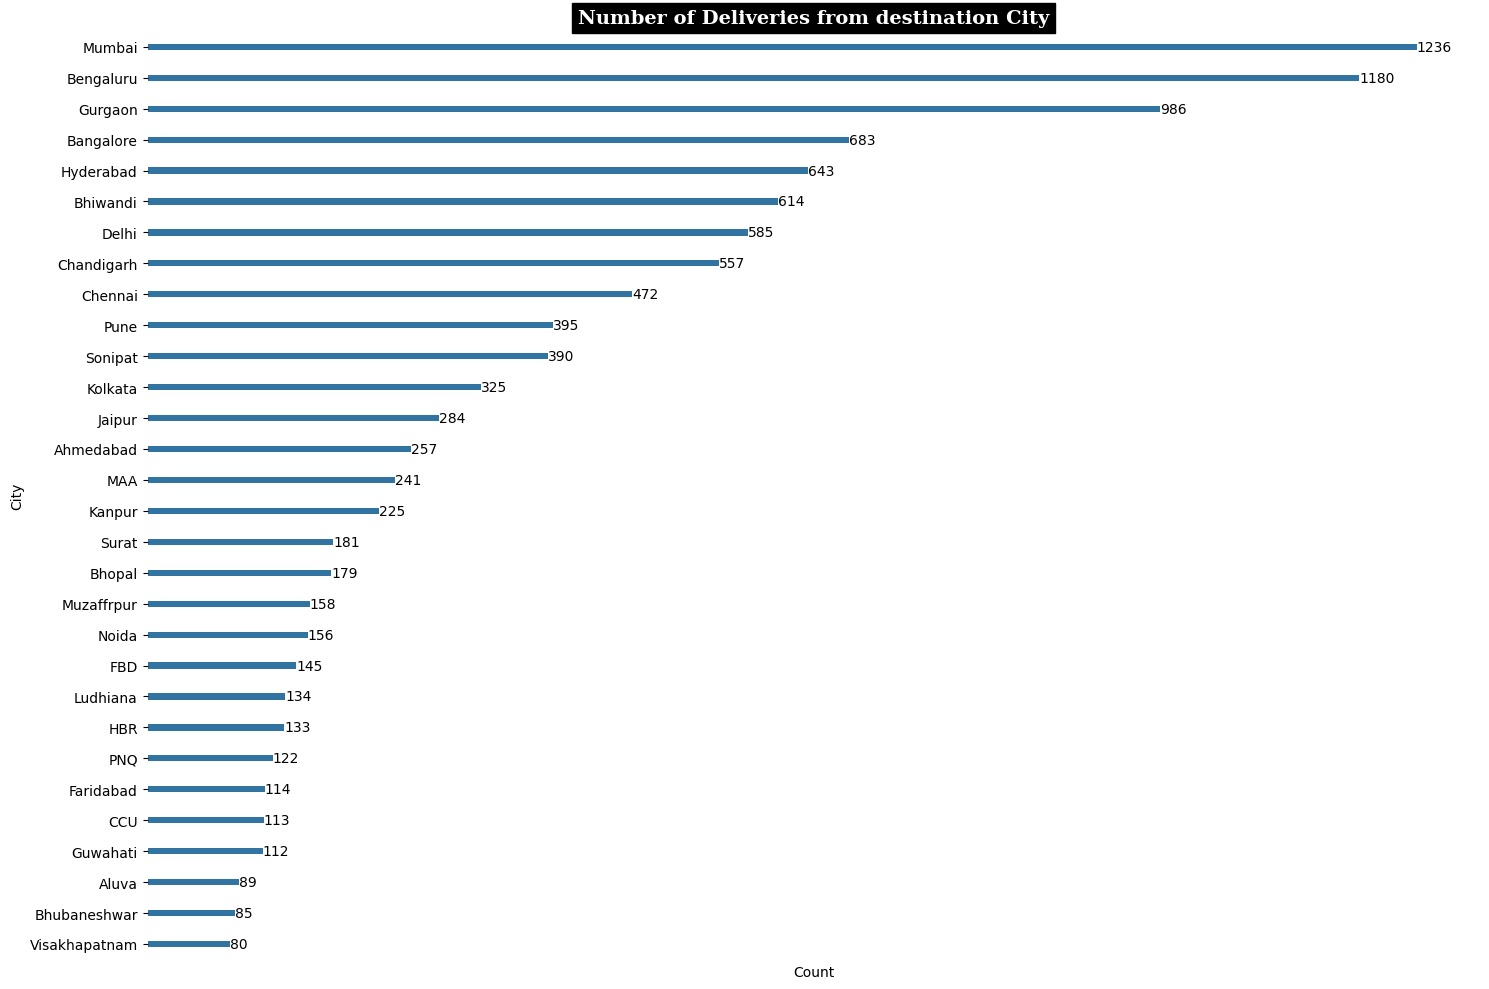

In [ ]:
city_counts = df_seg['destination_city'].value_counts().to_frame().reset_index()[:30]
city_counts.columns = ['City', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='City', x='Count', data=city_counts,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Number of Deliveries from destination City',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

**Destination State**

States like Karnataka, Maharashtra, Tamil Nadu, Haryana, and Uttar Pradesh where maximum packages are received in this month indicating significant engagement.

**Destination City**

Cities like Bengaluru, Mumbai, Gurgaon, Bhiwandi, Hyderabad, Delhi where the major no.of booking are received.

In [ ]:
#  Extracting features like month, year, day, etc. from Trip_creation_time
df_seg['trip_creation_month'] = df_seg['trip_creation_time'].dt.month
df_seg['trip_creation_year'] = df_seg['trip_creation_time'].dt.year
df_seg['trip_creation_day'] = df_seg['trip_creation_time'].dt.day
df_seg['trip_creation_hour'] = df_seg['trip_creation_time'].dt.hour
df_seg['trip_creation_weekday'] = df_seg['trip_creation_time'].dt.weekday
df_seg['trip_creation_week'] = df_seg['trip_creation_time'].dt.isocalendar().week
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   segment_key                     26368 non-null  object         
 1   trip_uuid                       26368 non-null  object         
 2   data                            26368 non-null  category       
 3   route_type                      26368 non-null  category       
 4   trip_creation_time              26368 non-null  datetime64[ns] 
 5   source_name                     26302 non-null  object         
 6   destination_name                26287 non-null  object         
 7   od_start_time                   26368 non-null  datetime64[ns] 
 8   od_end_time                     26368 non-null  datetime64[ns] 
 9   start_scan_to_end_scan          26368 non-null  float64        
 10  actual_distance_to_destination  26368 non-null  float64   

# **4) In-Depth Analysis**

In [ ]:
df_new = df_seg.copy()

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   segment_key                     26368 non-null  object         
 1   trip_uuid                       26368 non-null  object         
 2   data                            26368 non-null  category       
 3   route_type                      26368 non-null  category       
 4   trip_creation_time              26368 non-null  datetime64[ns] 
 5   source_name                     26302 non-null  object         
 6   destination_name                26287 non-null  object         
 7   od_start_time                   26368 non-null  datetime64[ns] 
 8   od_end_time                     26368 non-null  datetime64[ns] 
 9   start_scan_to_end_scan          26368 non-null  float64        
 10  actual_distance_to_destination  26368 non-null  float64   

In [ ]:
create_trip_dict={
'data':  'first',
'route_type': 'first',
'trip_creation_time' : 'first',
'source_name' : 'first',
'destination_name' : 'first',
'od_start_time' : 'first',
'od_end_time' : 'first',
'start_scan_to_end_scan' : 'sum',
'actual_distance_to_destination' : 'first',
'actual_time' : 'sum',
'osrm_time' : 'sum',
'osrm_distance' : 'sum',
'segment_actual_time' : 'sum',
'segment_osrm_time' : 'sum',
'segment_osrm_distance' : 'sum',
'segment_actual_time_sum' : 'sum',
'segment_osrm_time_sum' : 'sum',
'segment_osrm_distance_sum' : 'sum',
'od_total_time' : 'first',
'od_time_diff_hour' : 'first',
'source_city' : 'first',
'source_place' : 'first',
'source_state' : 'first',
'destination_city' : 'first',
'destination_place' : 'first',
'destination_state' : 'first',
'trip_creation_month' : 'first',
'trip_creation_year' : 'first',
'trip_creation_day' : 'first',
'trip_creation_hour' : 'first',
'trip_creation_weekday' : 'first',
'trip_creation_week' : 'first'
  }

df_trip_agg = df_new.groupby('trip_uuid').agg(create_trip_dict).reset_index()
df_trip_agg

,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,...,segment_osrm_distance_sum,od_total_time,od_time_diff_hour,source_city,source_place,source_state,destination_city,destination_place,destination_state,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week
0,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2259.0,383.759164,1562.0,717.0,991.3523,1548.0,1008.0,...,1320.4733,0 days 21:00:36.265275,21.010074,Kanpur,Central_H_6,Uttar Pradesh,Gurgaon,Bilaspur_HB,Haryana,9,2018,12,0,2,37
1,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,180.0,24.644021,143.0,68.0,85.1110,141.0,65.0,...,84.1894,0 days 00:58:49.943264,0.980540,Doddablpur,ChikaDPP_D,Karnataka,Chikblapur,ShntiSgr_D,Karnataka,9,2018,12,0,2,37
2,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,3933.0,237.439610,3347.0,1740.0,2354.0665,3308.0,1941.0,...,2545.2678,0 days 13:54:38.335721,13.910649,Gurgaon,Bilaspur_HB,Haryana,Chandigarh,Mehmdpur_H,Punjab,9,2018,12,0,2,37
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,...,19.8766,0 days 01:40:29.696112,1.674916,Mumbai,Hub,Maharashtra,Mumbai,MiraRd_IP,Maharashtra,9,2018,12,0,2,37
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,717.0,59.530350,341.0,117.0,146.7918,340.0,115.0,...,146.7919,0 days 02:32:00.774868,2.533549,Bellary,Dc,Karnataka,Hospet,Hospet,Karnataka,9,2018,12,0,2,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,Carting,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Zirakpur_DC (Punjab),2018-10-03 23:55:56.258533,2018-10-04 02:28:43.529141,257.0,26.500734,83.0,62.0,73.4630,82.0,62.0,...,64.8551,0 days 02:32:47.270608,2.546464,Chandigarh,Mehmdpur_H,Punjab,Zirakpur,DC,Punjab,10,2018,3,23,2,40
14813,trip-153861104386292051,test,Carting,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,...,16.0883,0 days 01:00:35.431279,1.009842,FBD,Balabhgarh_DPC,Haryana,Faridabad,Blbgarh_DC,Haryana,10,2018,3,23,2,40
14814,trip-153861106442901555,test,Carting,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-10-04 02:51:27.075797,2018-10-04 06:59:51.621332,421.0,19.349008,282.0,48.0,58.9037,281.0,88.0,...,104.8866,0 days 04:08:24.545535,4.140152,Kanpur,GovndNgr_DC,Uttar Pradesh,Kanpur,Central_H_6,Uttar Pradesh,10,2018,3,23,2,40
14815,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Eral_Busstand_D (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 01:44:53.808000,347.0,37.387664,264.0,179.0,171.1103,258.0,221.0,...,223.5324,0 days 01:45:39.417046,1.760949,Tirunelveli,VdkkuSrt_I,Tamil Nadu,Eral,Busstand_D,Tamil Nadu,10,2018,3,23,2,40


In [ ]:
df_trip_agg.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,14817,2018-09-22 12:44:19.555167744,2018-09-12 00:00:16.535741,2018-09-17 02:51:25.129125888,2018-09-22 04:02:35.066945024,2018-09-27 19:37:41.898427904,2018-10-03 23:59:42.701692,NaN
od_start_time,14817,2018-09-22 14:57:53.462293504,2018-09-12 00:01:00.113710,2018-09-17 05:31:39.706134016,2018-09-22 06:01:39.902524928,2018-09-27 20:54:10.390298880,2018-10-06 04:27:23.392375,NaN
od_end_time,14817,2018-09-22 20:38:29.816714240,2018-09-12 00:50:10.814399,2018-09-17 10:52:48.495513088,2018-09-22 12:54:03.089490944,2018-09-28 01:56:30.047727104,2018-10-08 03:00:24.353479,NaN
start_scan_to_end_scan,14817.0,530.810016,23.0,149.0,280.0,637.0,7898.0,658.705957
actual_distance_to_destination,14817.0,107.818645,9.001351,19.771018,32.407062,67.912123,1927.447705,248.882193
actual_time,14817.0,357.143754,9.0,67.0,149.0,370.0,6265.0,561.396157
osrm_time,14817.0,161.384018,6.0,29.0,60.0,168.0,2032.0,271.360995
osrm_distance,14817.0,204.344689,9.0729,30.8192,65.6188,208.475,2840.081,370.395573
segment_actual_time,14817.0,353.892286,9.0,66.0,147.0,367.0,6230.0,556.247965
segment_osrm_time,14817.0,180.949787,6.0,31.0,65.0,185.0,2564.0,314.542047


In [ ]:
df_trip_agg.describe(include = object).T

,count,unique,top,freq
trip_uuid,14817,14817,trip-153671041653548748,1
source_name,14807,933,Gurgaon_Bilaspur_HB (Haryana),1063
destination_name,14809,1044,Gurgaon_Bilaspur_HB (Haryana),744
source_city,14807,716,Gurgaon,1139
source_place,14807,790,Bilaspur_HB,1063
source_state,14807,29,Maharashtra,2714
destination_city,14809,854,Mumbai,1084
destination_place,14809,867,Bilaspur_HB,744
destination_state,14809,32,Maharashtra,2569


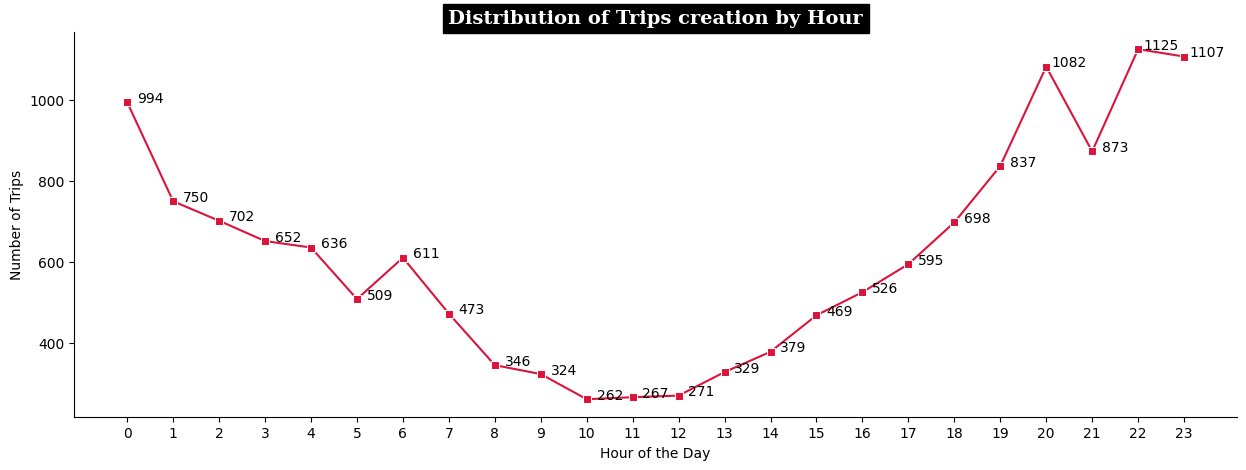

In [ ]:
trip_creation_by_hour = df_trip_agg.groupby(by='trip_creation_hour')['trip_uuid'].count().reset_index()

plt.figure(figsize=(15,5))
sns.lineplot(data=trip_creation_by_hour, x='trip_creation_hour', y='trip_uuid', marker='s', color='crimson')
plt.xticks(np.arange(0, 24))

for i, count in enumerate(trip_creation_by_hour['trip_uuid']):
    plt.text(trip_creation_by_hour['trip_creation_hour'][i]+0.5, count, count, ha='center')

plt.title('Distribution of Trips creation by Hour',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
sns.despine()
plt.show()

In [ ]:
numerical_columns = df_trip_agg.select_dtypes(include=[np.float32, np.float64])
numerical_columns

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
0,2259.0,383.759164,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,1548.0,1008.0,1320.4733,21.010074
1,180.0,24.644021,143.0,68.0,85.1110,141.0,65.0,84.1894,141.0,65.0,84.1894,0.980540
2,3933.0,237.439610,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,3308.0,1941.0,2545.2678,13.910649
3,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,59.0,16.0,19.8766,1.674916
4,717.0,59.530350,341.0,117.0,146.7918,340.0,115.0,146.7919,340.0,115.0,146.7919,2.533549
...,...,...,...,...,...,...,...,...,...,...,...,...
14812,257.0,26.500734,83.0,62.0,73.4630,82.0,62.0,64.8551,82.0,62.0,64.8551,2.546464
14813,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,21.0,11.0,16.0883,1.009842
14814,421.0,19.349008,282.0,48.0,58.9037,281.0,88.0,104.8866,281.0,88.0,104.8866,4.140152
14815,347.0,37.387664,264.0,179.0,171.1103,258.0,221.0,223.5324,258.0,221.0,223.5324,1.760949


In [ ]:
num_cols = numerical_columns.columns.tolist()
num_cols

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_actual_time_sum',
 'segment_osrm_time_sum',
 'segment_osrm_distance_sum',
 'od_time_diff_hour']

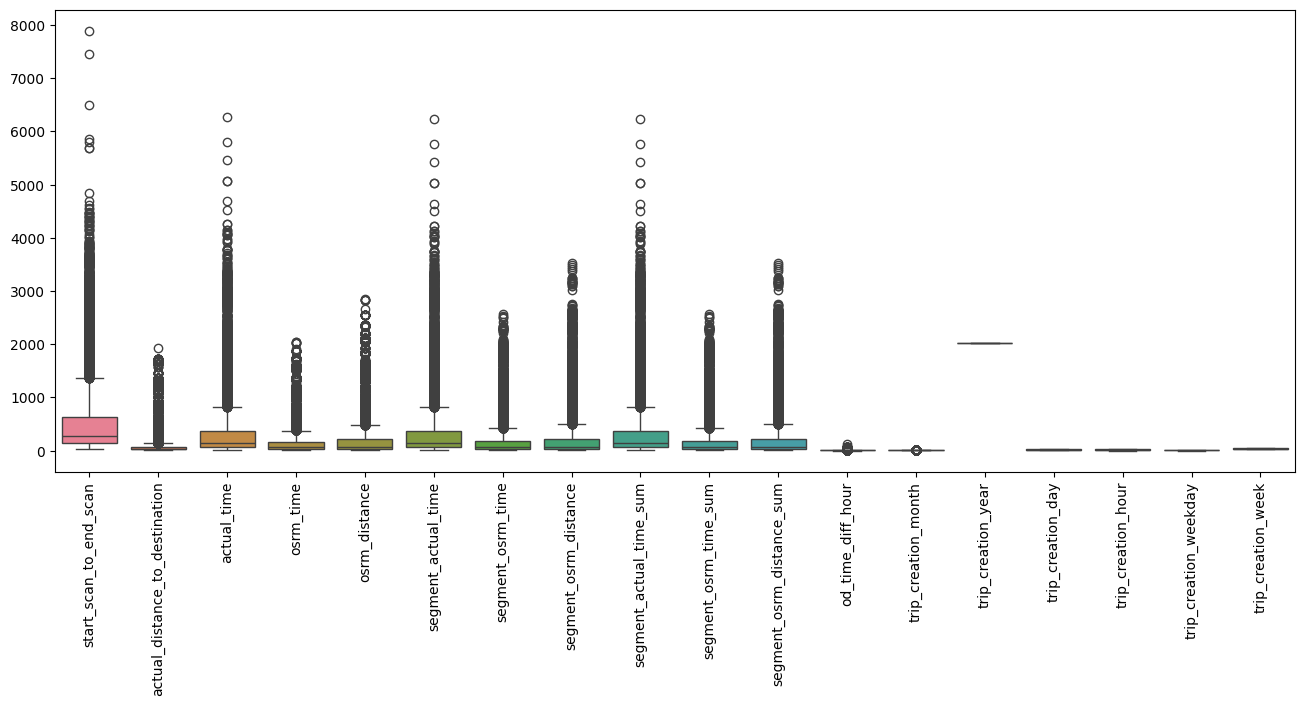

In [ ]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
sns.boxplot(data = df_trip_agg)
plt.show()

In [ ]:
# obtain the first quartile
Q1 = numerical_columns.quantile(0.25)

# obtain the third quartile
Q3 = numerical_columns.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

start_scan_to_end_scan            488.000000
actual_distance_to_destination     48.141105
actual_time                       303.000000
osrm_time                         139.000000
osrm_distance                     177.655800
segment_actual_time               301.000000
segment_osrm_time                 154.000000
segment_osrm_distance             186.147900
segment_actual_time_sum           301.000000
segment_osrm_time_sum             154.000000
segment_osrm_distance_sum         186.147900
od_time_diff_hour                   3.843134
dtype: float64


In [ ]:
categorical_cols = ['data','route_type']

In [ ]:
# one hot encoding the categorical features
ohe = OneHotEncoder(sparse_output=False)
encoded_cat_cols = ohe.fit_transform(df_trip_agg[categorical_cols])

categorical_encoded_df = pd.DataFrame(encoded_cat_cols, columns=ohe.get_feature_names_out(categorical_cols))
display(categorical_encoded_df)

encoded_df = pd.concat([df_trip_agg,categorical_encoded_df],axis=1)
encoded_df


,data_test,data_training,route_type_Carting,route_type_FTL
0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0
...,...,...,...,...
14812,1.0,0.0,1.0,0.0
14813,1.0,0.0,1.0,0.0
14814,1.0,0.0,1.0,0.0
14815,1.0,0.0,1.0,0.0


,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,...,source_place,source_state,destination_city,destination_place,destination_state,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week,data_test,data_training,route_type_Carting,route_type_FTL
0,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2259.0,383.759164,1562.0,717.0,991.3523,1548.0,1008.0,...,Central_H_6,Uttar Pradesh,Gurgaon,Bilaspur_HB,Haryana,9,2018,12,0,2,37,0.0,1.0,0.0,1.0
1,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,180.0,24.644021,143.0,68.0,85.1110,141.0,65.0,...,ChikaDPP_D,Karnataka,Chikblapur,ShntiSgr_D,Karnataka,9,2018,12,0,2,37,0.0,1.0,1.0,0.0
2,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,3933.0,237.439610,3347.0,1740.0,2354.0665,3308.0,1941.0,...,Bilaspur_HB,Haryana,Chandigarh,Mehmdpur_H,Punjab,9,2018,12,0,2,37,0.0,1.0,0.0,1.0
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,...,Hub,Maharashtra,Mumbai,MiraRd_IP,Maharashtra,9,2018,12,0,2,37,0.0,1.0,1.0,0.0
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,717.0,59.530350,341.0,117.0,146.7918,340.0,115.0,...,Dc,Karnataka,Hospet,Hospet,Karnataka,9,2018,12,0,2,37,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,Carting,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Zirakpur_DC (Punjab),2018-10-03 23:55:56.258533,2018-10-04 02:28:43.529141,257.0,26.500734,83.0,62.0,73.4630,82.0,62.0,...,Mehmdpur_H,Punjab,Zirakpur,DC,Punjab,10,2018,3,23,2,40,1.0,0.0,1.0,0.0
14813,trip-153861104386292051,test,Carting,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,...,Balabhgarh_DPC,Haryana,Faridabad,Blbgarh_DC,Haryana,10,2018,3,23,2,40,1.0,0.0,1.0,0.0
14814,trip-153861106442901555,test,Carting,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-10-04 02:51:27.075797,2018-10-04 06:59:51.621332,421.0,19.349008,282.0,48.0,58.9037,281.0,88.0,...,GovndNgr_DC,Uttar Pradesh,Kanpur,Central_H_6,Uttar Pradesh,10,2018,3,23,2,40,1.0,0.0,1.0,0.0
14815,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Eral_Busstand_D (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 01:44:53.808000,347.0,37.387664,264.0,179.0,171.1103,258.0,221.0,...,VdkkuSrt_I,Tamil Nadu,Eral,Busstand_D,Tamil Nadu,10,2018,3,23,2,40,1.0,0.0,1.0,0.0


# **5) Hypothesis Testing:**
Perform hypothesis testing / visual analysis between :

* actual_time aggregated value and OSRM time aggregated value.

* actual_time aggregated value and segment actual time aggregated value.

* OSRM distance aggregated value and segment OSRM distance aggregated value.

* OSRM time aggregated value and segment OSRM time aggregated value.

<Axes: xlabel='segment_actual_time', ylabel='segment_osrm_time'>

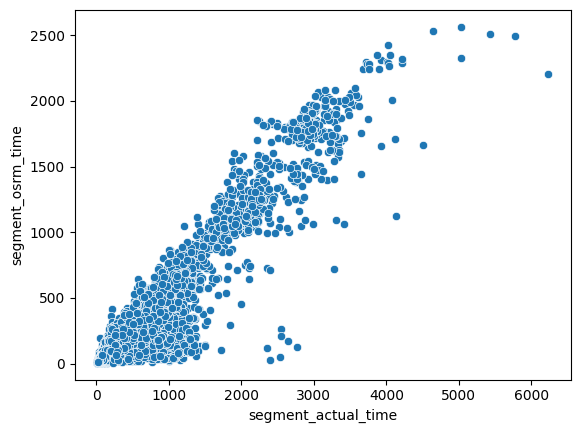

In [ ]:
#Visualization of segment_actual_time and segment_osrm_time
sns.scatterplot(x=df_trip_agg["segment_actual_time"], y=df_trip_agg["segment_osrm_time"])



In [ ]:
alpha = 0.05

test_statistics,p_value=pearsonr(df_trip_agg["actual_time"], df_trip_agg["osrm_time"])
print(p_value)

if p_value < alpha:
    print("Reject Null Hypotheis, Both Variables are correlated")
else:
    print("Fail to Reject Null Hypothesis,Both Variables are not correlated")

0.0
Reject Null Hypotheis, Both Variables are correlated


T-Test for actual_time and segment_actual_time

H0: Mean of actual_time and segment_actual_time are same (mu_1 = mu_2)

Ha: Mean of actual_time and segment_actual_time are not same (mu_1 != mu_2)

In [ ]:
test_statistics,p_value=ttest_ind(df_trip_agg["actual_time"],df_trip_agg["segment_actual_time"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Mean of actual_time and segment_actual_time are not same")
else:
    print("Fail to Reject Null Hypothesis,Mean of actual_time and segment_actual_time are same")

0.6165138648224772
Fail to Reject Null Hypothesis,Mean of actual_time and segment_actual_time are same


T-Test for osrm_time and segment_osrm_time

H0: Mean of osrm_time and segment_osrm_time are same (mu_1 = mu_2)

Ha: Mean of osrm_time and segment_osrm_time are not same (mu_1 != mu_2)

In [ ]:
test_statistics,p_value=ttest_ind(df_trip_agg["osrm_time"],df_trip_agg["segment_osrm_time"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Mean of osrm_time and segment_osrm_time are not same")
else:
    print("Fail to Reject Null Hypothesis,Mean of osrm_time and segment_osrm_time are same")

9.956426798219171e-09
Reject Null Hypotheis, Mean of osrm_time and segment_osrm_time are not same


T-Test for osrm_distance and segment_osrm_distance

H0: Mean of osrm_distance and segment_osrm_distance are same (mu_1 = mu_2)

Ha: Mean of osrm_distance and segment_osrm_distance are not same (mu_1 != mu_2)

In [ ]:
test_statistics,p_value=ttest_ind(df_trip_agg["osrm_distance"],df_trip_agg["segment_osrm_distance"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Mean of osrm_distance and segment_osrm_distance are not same")
else:
    print("Fail to Reject Null Hypothesis,Mean of osrm_distance and segment_osrm_distance are same")

3.842631473353718e-05
Reject Null Hypotheis, Mean of osrm_distance and segment_osrm_distance are not same


# **Business Insights**

By doing Hypothesis testing between osrm data and actual data, we can observe that mean of both data is not the same.

The Timeframe of the data is '2018-09-12' to '2018-10-08' i.e(26 days).

Distance and time attributes are highly correlated, so its obvious that distance between places will matter in speedy delivery

Maximum orders are found from Maharashtra, so we can say more customers in the state.

Minimum trips are from North-Eastern states so business needs improvement in that states

The busiest warehouses are Gurgaon_Bilaspur, Bhiwandi, and Bangalore, So, They should be more focused.

The Busiest route is Bangalore_Nalamngla_H (Karnataka) to Bengaluru_KGAirport_HB (Karnataka). The average distance between them is 28.03 and the average time taken for the given trip is 87.87

# **Recommendations**

From the above analysis, It can be observed that the actual time taken for delivery is higher compared to osrm time. So we can optimize our services using osrm.

We have the busiest route in Bangaluru, so we can increase our service by providing different outlets and increasing the manpower

In Maharashtra, we have the highest number of trips, so we should increase outlets in the state.

In North-Eastern states, we have very less business, so we need to optimize their condition and also provide marketing to increase services.

We have the busiest warehouse in Gurgaon_Bilaspur, so we need to increase the number of warehouses or increase manpower to efficiently handle the load.

OSRM provides us best minimal distance